In [159]:
import pandas as pd
#reading the data
train = pd.read_csv("adult.data",
                 names=['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])
test = pd.read_csv("adult.test",skiprows=1,
                 names=['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])
df = train.append(test,ignore_index=True)

In [160]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [161]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [162]:
(df['income'].dtype == "object" ) & (df['income'].name != 'income')

False

In [163]:
#removing extra whitespace
df = df.apply(lambda x:x.str.strip() if (x.dtype == "object") & (x.name != "income") else x )


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [165]:
#o/p column unique values
df.income.value_counts(dropna=False)

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: income, dtype: int64

In [166]:
#df['income'] = df['income'].astype(str)
#df[df.income == ' <=50K.'] = ' <=50K'
#df[df.income == ' >50K.'] = ' >50K'

In [167]:
 #df['income'][df.income == '<=50K.'] = '<=50K'

In [168]:
#o/p column unique values
df.income.value_counts(dropna=False)

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: income, dtype: int64

In [169]:
# <=50K and <=50K. are one and the same (same with > case), so reforming
#df['income'] = df['income'].map({'<=50K':0,'<=50K.':0,'>50K':1,'>50K.':1})
df['income'] = df['income'].astype(str)
df['income']=df['income'].map({' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1})
#o/p column unique values
df.income.value_counts(dropna=False)

0    37155
1    11687
Name: income, dtype: int64

In [170]:
#Replacing "?" with nan
import numpy as np
df[df == '?'] = np.nan

C:\Users\abanthiy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [171]:
df.workclass.value_counts(dropna=False)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NaN                  2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [172]:
df['native-country'].value_counts(dropna=False)

United-States                 43832
Mexico                          951
NaN                             857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [173]:
df.occupation.value_counts(dropna=False)

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
NaN                  2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [174]:
#As occupation,native-country and workclass columns are having nan values, replacing NaN with the mode
for col in ['occupation','native-country','workclass'] :
    df[col].fillna(df[col].mode()[0],inplace =True)

    

In [175]:

# Confirm All Missing Data is Handled
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [176]:
df['education'] = df['education'].astype('category')
df['workclass'] = df['workclass'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null category
fnlwgt            48842 non-null int64
education         48842 non-null category
education-num     48842 non-null int64
marital-status    48842 non-null category
occupation        48842 non-null category
relationship      48842 non-null category
race              48842 non-null category
sex               48842 non-null category
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
income            48842 non-null int64
dtypes: category(7), int64(7), object(1)
memory usage: 3.3+ MB


In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from collections import Counter

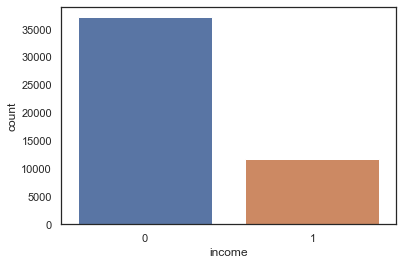

In [178]:

sns.set(style='white', context='notebook', palette='deep')

# Identify Numeric features
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

# Count of >50K & <=50K
sns.countplot(df['income'],label="Count")
plt.show()


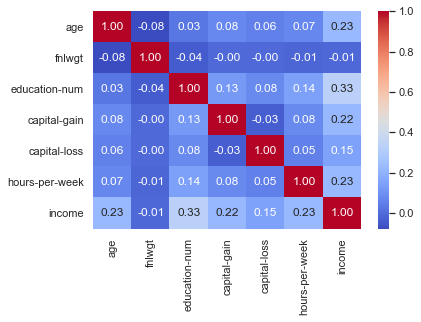

In [179]:
g = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

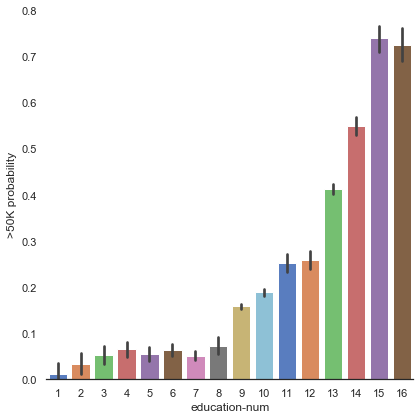

In [183]:
# Explore Education Num vs Income
g = sns.factorplot(x="education-num",y="income",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

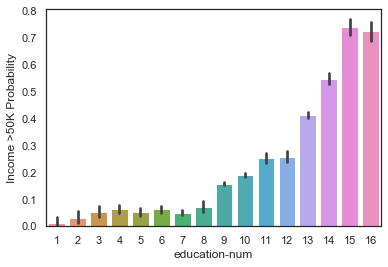

In [193]:


#g = sns.barplot(x="education-num",y="income",data=df)
#g = g.set_ylabel("Income >50K Probability")
#plt.show()

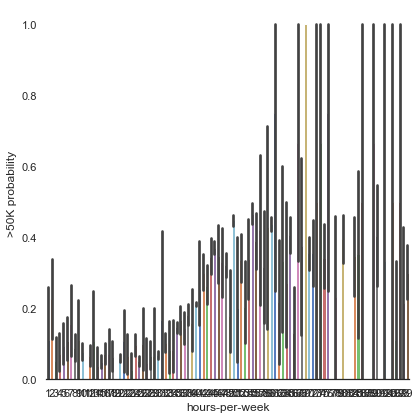

In [184]:
# Explore Hours Per Week vs Income
g = sns.factorplot(x="hours-per-week",y="income",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

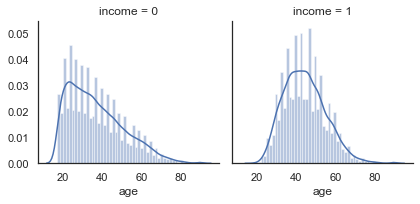

In [187]:
# Explore Age vs Income
g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "age")
plt.show()

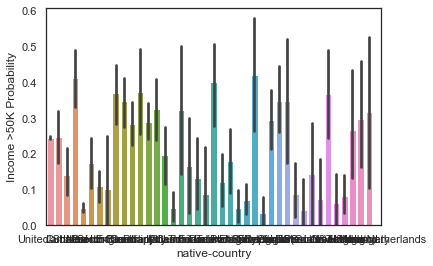

In [189]:
# Explore Native Nation vs Income
g = sns.barplot(x="native-country",y="income",data=df)
g = g.set_ylabel("Income >50K Probability")
plt.show()

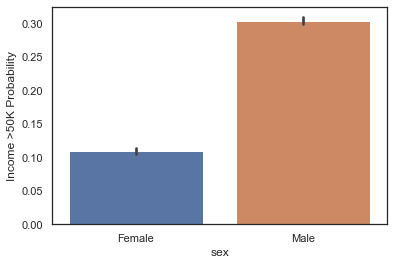

In [195]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=df)
g = g.set_ylabel("Income >50K Probability")
plt.show()


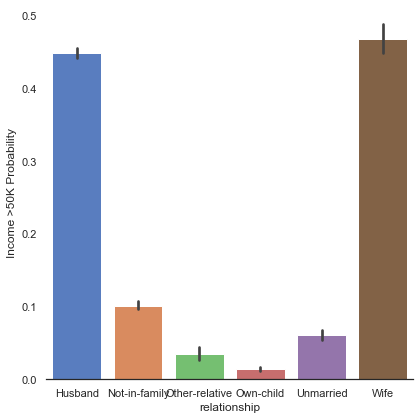

In [196]:

# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=df,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

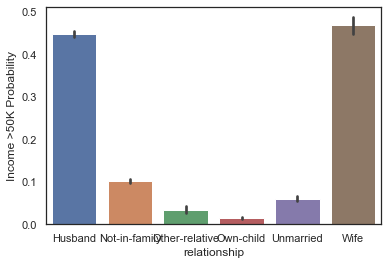

In [198]:
# Explore relationship vs Income
#g = sns.barplot(x="relationship",y="income",data=df)
#g = g.set_ylabel("Income >50K Probability")
#plt.show()

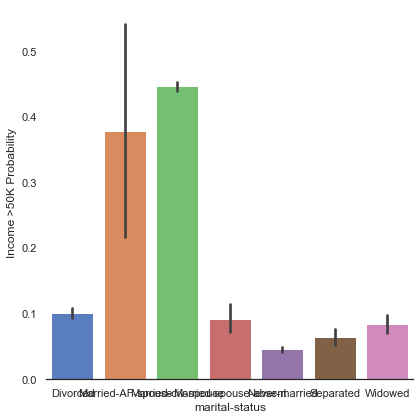

In [199]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital-status",y="income",data=df,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

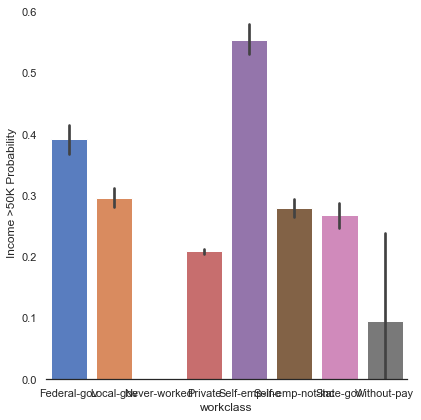

In [200]:
# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="income",data=df,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()